<a href="https://colab.research.google.com/github/Sirczechs-Kaustubh/Diabetes_Predicition_ML/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("blood_glucose_data.xlsx")

In [4]:
df.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N


In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N)
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.715481,77.173493,118.187165,91.524191,97.356146,97.382403,0.121692,0.145560
std,25.585606,42.998142,7.241511,7.700363,10.409780,0.813555,0.848689,0.326940,0.352674
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674466,97.000000,0.000000,0.000000
50%,14.000000,83.000000,76.000000,119.000000,89.000000,97.326523,98.000000,0.000000,0.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949904,98.000000,0.000000,0.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000


<Axes: >

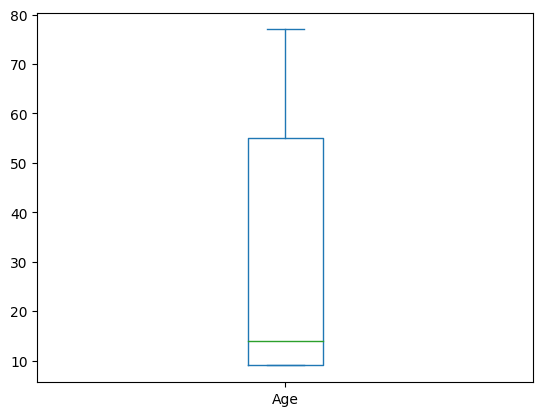

In [7]:
df.Age.plot.box()

<Axes: ylabel='Diabetic/NonDiabetic (D/N)'>

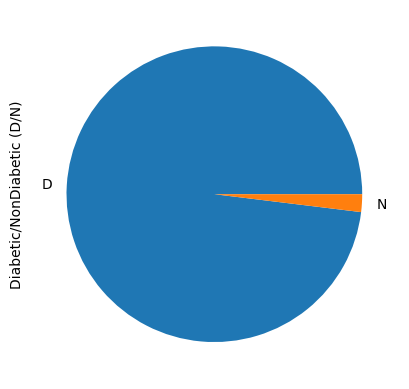

In [8]:
df[df.columns[-1]].value_counts(normalize = True).plot.pie()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Code for splitting the data into training and testing
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score #Code for Classification metrics


In [16]:
rfc = RandomForestClassifier()
mlpc = MLPClassifier()
lrc = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier()

In [11]:
x = df.iloc[:, :-1]
y = df["Diabetic/NonDiabetic (D/N)"]


In [12]:
x.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N)
0,9,79,73,118,98,98.300707,99,0,0
1,9,80,73,119,102,98.300707,94,1,0
2,9,70,76,110,81,98.300707,98,1,0
3,9,70,78,115,96,98.300707,96,1,0
4,66,100,96,144,92,97.807052,98,0,0


In [13]:
y.head()

0    N
1    N
2    N
3    N
4    N
Name: Diabetic/NonDiabetic (D/N), dtype: object

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
rfc_pred = rfc.fit(x_train,y_train).predict(x_test)
mlpc_pred = mlpc.fit(x_train,y_train).predict(x_test)
lrc_pred = lrc.fit(x_train,y_train).predict(x_test)
dtc_pred = dtc.fit(x_train,y_train).predict(x_test)

In [18]:
print(rfc_pred)
print(mlpc_pred)
print(lrc_pred)
print(dtc_pred)

['D' 'D' 'D' ... 'D' 'D' 'D']
['D' 'D' 'D' ... 'D' 'D' 'D']
['D' 'D' 'D' ... 'D' 'D' 'D']
['D' 'D' 'D' ... 'D' 'D' 'D']


In [25]:
acc=[None]*4

In [26]:
acc[0]=accuracy_score(y_test,rfc_pred)

In [27]:
acc[1]=accuracy_score(y_test,mlpc_pred)

In [28]:
acc[2]=accuracy_score(y_test,lrc_pred)

In [29]:
acc[3]=accuracy_score(y_test,dtc_pred)

In [31]:
acc

[0.9964643488509134,
 0.9944018856806128,
 0.9890984089569829,
 0.9955804360636418]

In [30]:
max(acc)

0.9964643488509134

In [32]:
corr=[None]*4

In [34]:
corr[0]=matthews_corrcoef(y_test, rfc_pred)
corr[1]=matthews_corrcoef(y_test, mlpc_pred)
corr[2]=matthews_corrcoef(y_test, lrc_pred)
corr[3]=matthews_corrcoef(y_test, dtc_pred)

In [35]:
corr

[0.9044032916027877,
 0.8440081677486598,
 0.6654595053876196,
 0.8821605814459333]

In [36]:
f1=[None]*4

In [40]:
f1[0]= f1_score(y_test, rfc_pred, average="weighted")
f1[1]= f1_score(y_test, mlpc_pred, average="weighted")
f1[2]= f1_score(y_test, lrc_pred, average="weighted")
f1[3]= f1_score(y_test, dtc_pred, average="weighted")


In [41]:
f1

[0.9962936467724461, 0.993947402500227, 0.9870493814284724, 0.9954964448443664]

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sns.set_theme(style="whitegrid")

<Axes: >

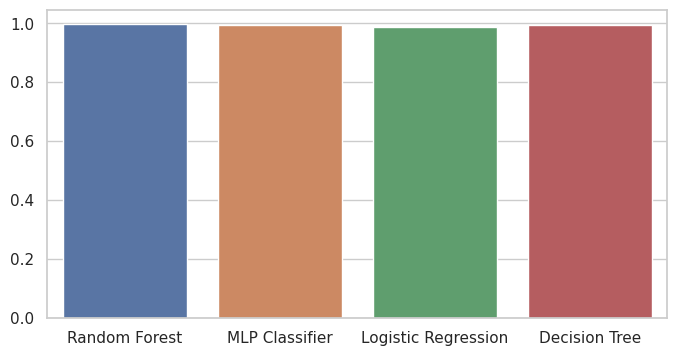

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=f1, hue = models)

In [72]:
models = ['Random Forest', 'MLP Classifier', 'Logistic Regression', 'Decision Tree']


#plt.bar(models, f1, color=['black', 'red', 'green', 'cyan'])
#plt.xlabel('Models')
#plt.ylabel('F1 Score')
#plt.title('F1 Scores of the Models')
#plt.show()

<Axes: >

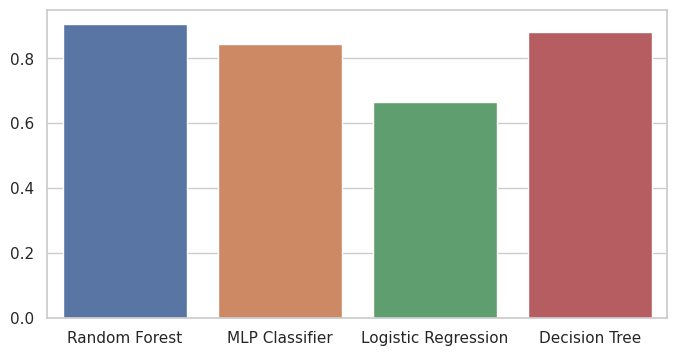

In [68]:
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=corr, hue = models)

In [71]:
models = ['Random Forest', 'MLP Classifier', 'Logistic Regression', 'Decision Tree']


#plt.bar(models, corr, color=['black', 'red', 'green', 'cyan'])
#plt.xlabel('Models')
#plt.ylabel('MCC Score')
#plt.title('MCC of the Models')
#plt.show()

<Axes: >

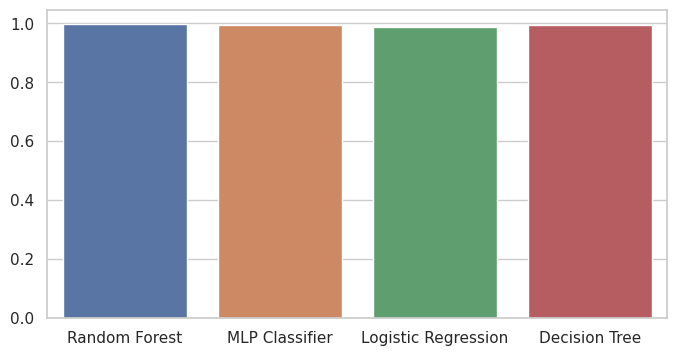

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=acc, hue = models)

In [70]:
models = ['Random Forest', 'MLP Classifier', 'Logistic Regression', 'Decision Tree']


#plt.bar(models, acc, color=['black', 'red', 'green', 'cyan'])
#plt.xlabel('Models')
#plt.ylabel('Accuracy Scores')
#plt.title('Acc Scores of the Models')
#plt.show()